In [8]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

In [45]:
#=================================
# TOKENIZATION
#=================================
# Intro to tokenization
# Tokenization is simply breaking text down into "tokens" which, in this case, is words!
# Here is a sample sentence. It can have punctuation, CAPS!, etc.

example_text = "Kendra loves cats. In fact, she has TEN cats. If she didn't have a house, a husband and a graduate degree in data science, she'd be a cat lady!"
tokenized_example = word_tokenize(example_text)
print(tokenized_example)

['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'she', 'has', 'TEN', 'cats', '.', 'If', 'she', 'did', "n't", 'have', 'a', 'house', ',', 'a', 'husband', 'and', 'a', 'graduate', 'degree', 'in', 'data', 'science', ',', 'she', "'d", 'be', 'a', 'cat', 'lady', '!']


In [51]:
#=================================
# FREQUENCY DISTRIBUTIONS
#=================================
# After turning the words into tokens, we can start to treat them a data
# For example, we can use a FREQUENCY DISTRIBUTION to count the words
fdist = FreqDist(tokenized_example)
print(fdist.items())

dict_items([('Kendra', 1), ('loves', 1), ('cats', 2), ('.', 2), ('In', 1), ('fact', 1), (',', 3), ('she', 3), ('has', 1), ('TEN', 1), ('If', 1), ('did', 1), ("n't", 1), ('have', 1), ('a', 4), ('house', 1), ('husband', 1), ('and', 1), ('graduate', 1), ('degree', 1), ('in', 1), ('data', 1), ('science', 1), ("'d", 1), ('be', 1), ('cat', 1), ('lady', 1), ('!', 1)])


In [52]:
# We can use the same Frequency Distribution to find the most common word
print(fdist.most_common(1))

[('a', 4)]


In [53]:
# We can use the Frequency Distribution to find the frequency of specific words
print(fdist.freq("cat")) 

0.02702702702702703


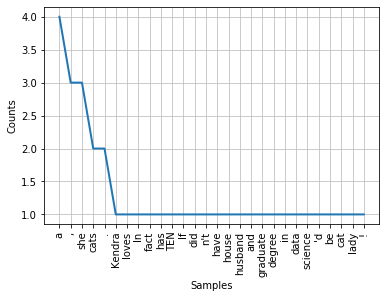

In [54]:
# And we can use the Frequency Distribution to graph our sentence by word freqency
fdist.N()
fdist.plot(30,cumulative=False)
plt.show()

In [39]:
# But... the word "a" doesn't really tell us much about that sentence, does it?
# "a" is what is considered to be a STOPWORD

In [41]:
#=================================
# STOPWORDS 
#=================================
stop_words = set(stopwords.words("english"))
print(stop_words)

{"haven't", 'why', 'so', "mightn't", 'your', "won't", 'm', 'for', "isn't", 'between', 'this', 'didn', "you're", 'ain', 'not', "it's", 'itself', 'what', 'some', 'now', 'll', 'by', 'but', 'nor', 'ourselves', 'those', 'yours', 'of', 'she', 'to', 'doesn', 'until', "needn't", 'herself', 'is', 'our', 'does', 'then', 'from', 'haven', "hadn't", 'or', "she's", 'over', "didn't", 'are', 'will', "shan't", 'very', 'too', 'had', 'off', 'through', 'he', 're', 'under', 'myself', 'when', 'don', 'each', 'be', 'ours', 'most', 'o', 'y', 'am', 'hers', 'which', 'can', 'yourselves', 'wasn', 'd', 'there', "shouldn't", 'wouldn', 'whom', 'into', 'an', 'in', 'a', 'just', 'you', 'them', "that'll", 'theirs', "weren't", 'they', 'it', 'been', 'having', 'that', 'themselves', 'and', 'about', 'further', "wouldn't", "you'll", 'as', 'my', "wasn't", 'needn', "doesn't", 'its', 'won', 'again', 'where', 'mustn', 'than', "you'd", 'both', "should've", 'weren', 'being', 'shouldn', 'me', 'ma', 'were', 'hasn', "hasn't", 'more', '

In [55]:
#=================================
# REMOVING STOPWORDS 
#=================================
filtered_text=[]
for w in tokenized_example:
 #   print(w)
    if w not in stop_words:
        filtered_text.append(w)
print("Tokenized text:",tokenized_example)
print("Filterd text:",filtered_text)

Tokenized text: ['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'she', 'has', 'TEN', 'cats', '.', 'If', 'she', 'did', "n't", 'have', 'a', 'house', ',', 'a', 'husband', 'and', 'a', 'graduate', 'degree', 'in', 'data', 'science', ',', 'she', "'d", 'be', 'a', 'cat', 'lady', '!']
Filterd text: ['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'TEN', 'cats', '.', 'If', "n't", 'house', ',', 'husband', 'graduate', 'degree', 'data', 'science', ',', "'d", 'cat', 'lady', '!']


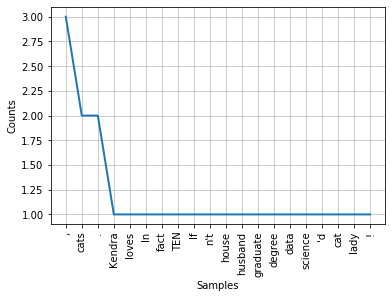

In [56]:
fdist_filtered = FreqDist(filtered_text)
# fdist.N()
fdist_filtered.plot(30,cumulative=False)
plt.show()

In [ ]:
# But wait, doesn't the word "cat" appear more than 2 times? Oh! That's because we have "cat" AND "cats" 
# which the computer is counting as two different words!